<a href="https://colab.research.google.com/github/fmgarciadiaz/PythonTests/blob/master/Colab_Flujos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

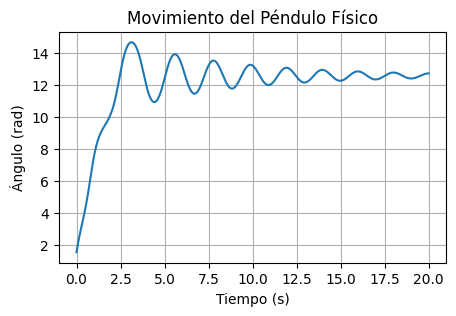

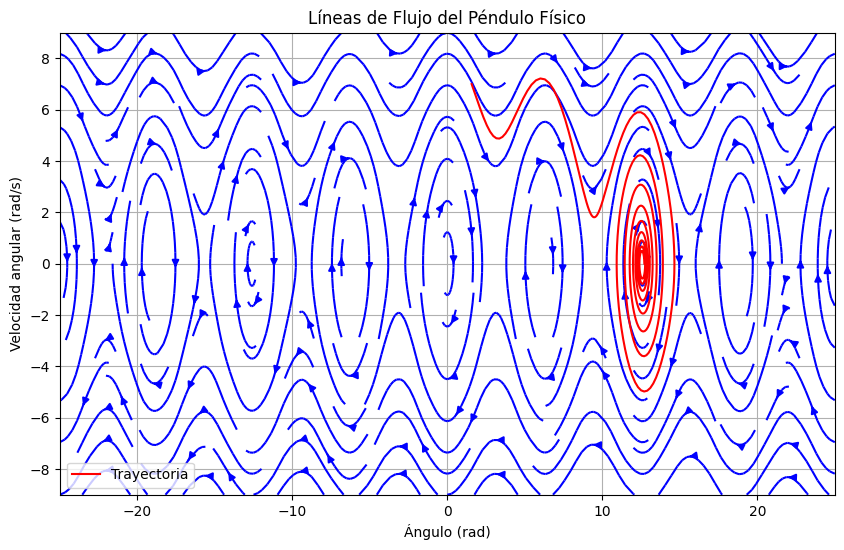

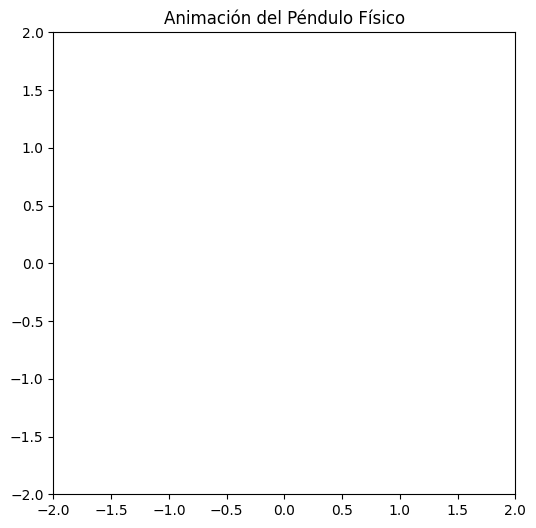

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from base64 import b64encode

# Parámetros del péndulo físico
g = 9.81  # Aceleración debida a la gravedad (m/s^2)
L = 1.0  # Longitud del péndulo (m)
m = 1.0  # Masa del péndulo (kg)

# Función que define el sistema de ecuaciones diferenciales
def pendulo_fisico(y, t, g, L):
    theta, omega = y
    dydt = [omega, -(g / L) * np.sin(theta) - 0.3 * omega]
    return dydt

# Condiciones iniciales
theta0 = np.pi / 2  # Ángulo inicial (radianes)
omega0 = 7  # Velocidad angular inicial (rad/s)
y0 = [theta0, omega0]

# Tiempo de simulación
t = np.linspace(0, 20, 500)

# Resolver las ecuaciones diferenciales
sol = odeint(pendulo_fisico, y0, t, args=(g, L))
theta = sol[:, 0]
omega = sol[:, 1]

# Gráfica del ángulo en función del tiempo
plt.figure(figsize=(5, 3))
plt.plot(t, theta)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Movimiento del Péndulo Físico')
plt.grid(True)
plt.show()

# Gráfica de las líneas de flujo del campo
theta_values = np.linspace(-25, 25, 40)
omega_values = np.linspace(-9, 9, 40)
Theta, Omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = Omega
domega_dt = -(g / L) * np.sin(Theta)

plt.figure(figsize=(10, 6))
plt.streamplot(Theta, Omega, dtheta_dt, domega_dt, density=1.5, color='blue')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Líneas de Flujo del Péndulo Físico')
plt.grid(True)

# Agregar la trayectoria del péndulo en el espacio fase
plt.plot(theta, omega, color='red', label='Trayectoria')
plt.legend()
plt.show()

# Animación del péndulo
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')
ax.set_title('Animación del Péndulo Físico')

line, = ax.plot([], [], 'k-', lw=2)
ball, = ax.plot([], [], 'ro', markersize=10)

def init():
    line.set_data([], [])
    ball.set_data([], [])
    return line, ball

def animate(i):
    x = L * np.sin(theta[i])
    y = -L * np.cos(theta[i])
    line.set_data([0, x], [0, y])
    ball.set_data([x], [y])
    return line, ball

ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True, interval=20, repeat=True)
plt.show()

# Guardar la animación como un archivo de video
ani.save('pendulo.mp4', writer='ffmpeg')

# Mostrar el video en Colab
mp4 = open('pendulo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

